In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Python\Vs_Python\Projects\Iris_Classification\Dataset\Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df.drop('Id',axis=1)

In [5]:
X = df.drop('Species',axis=1)
y = df['Species']

In [6]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

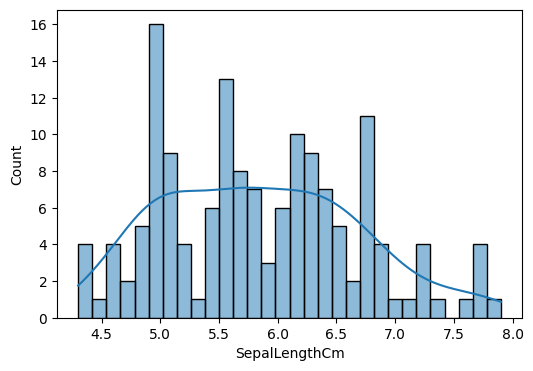

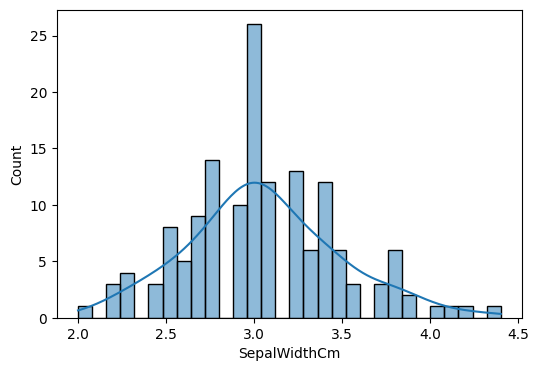

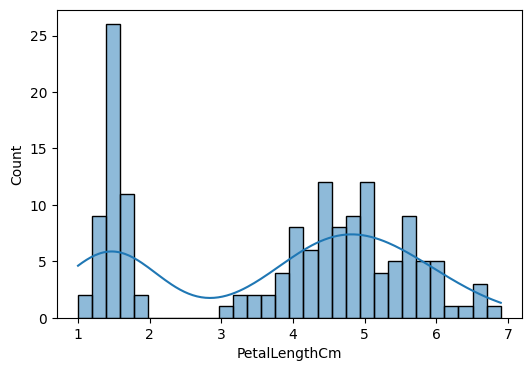

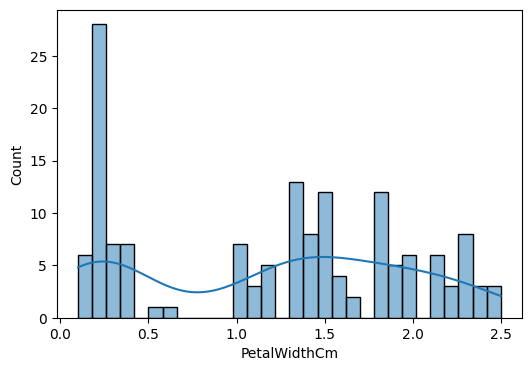

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in X:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=i, kde=True,bins=30)
    plt.show()

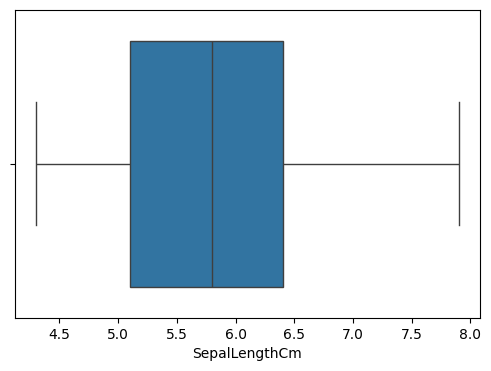

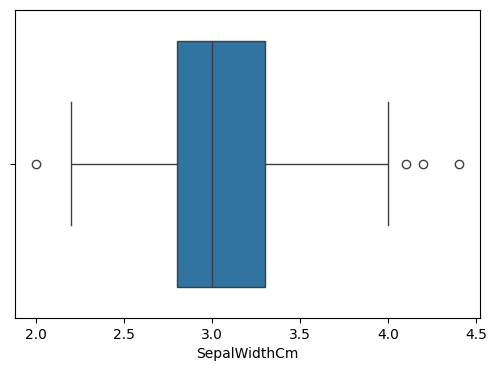

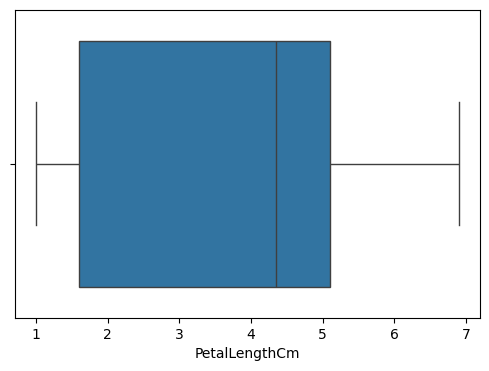

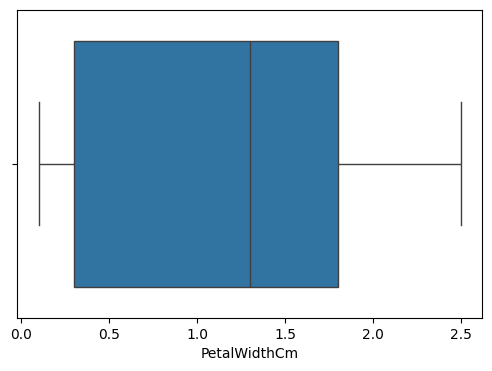

In [9]:
for i in X:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=i)
    plt.show()

In [10]:
X.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [11]:
X.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


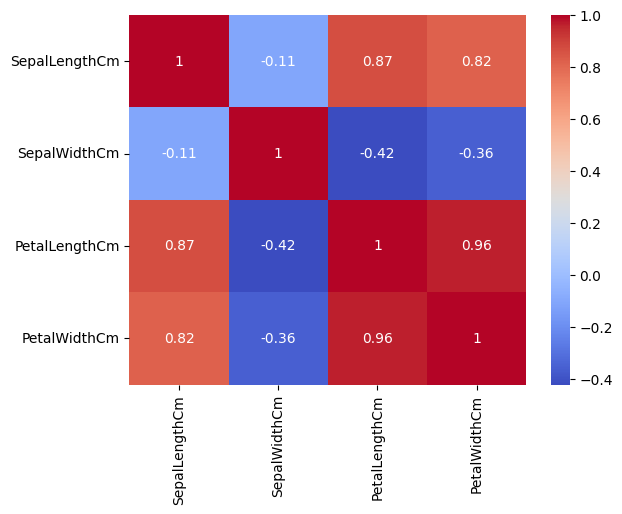

In [12]:
sns.heatmap(data=X.corr(),annot=True,cmap='coolwarm')
plt.show()

In [13]:
df.groupby(['Species'])['SepalLengthCm'].median()

Species
Iris-setosa        5.0
Iris-versicolor    5.9
Iris-virginica     6.5
Name: SepalLengthCm, dtype: float64

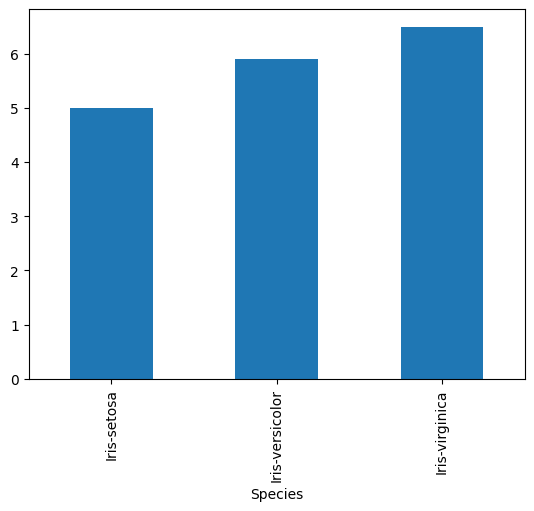

In [14]:
df.groupby(['Species'])['SepalLengthCm'].median().plot(kind='bar')
plt.show()

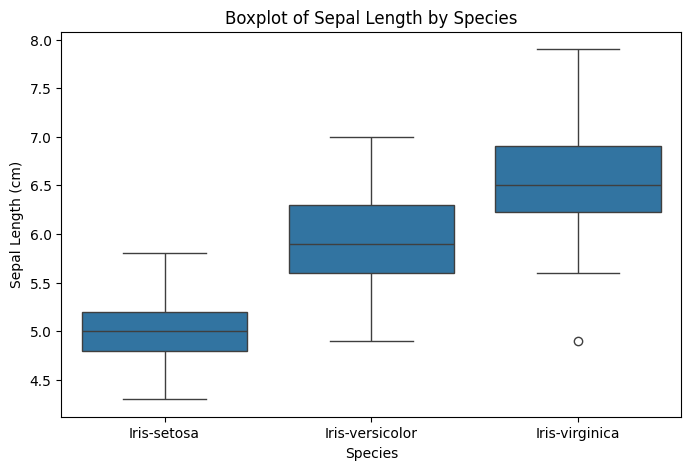

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

In [16]:
df.groupby(['Species'])['SepalWidthCm'].median()

Species
Iris-setosa        3.4
Iris-versicolor    2.8
Iris-virginica     3.0
Name: SepalWidthCm, dtype: float64

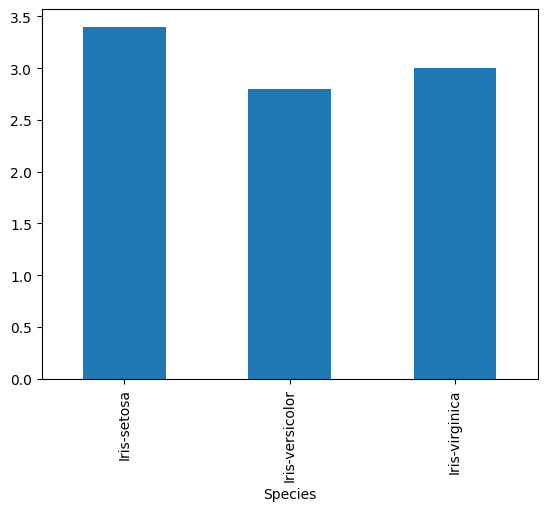

In [17]:
df.groupby(['Species'])['SepalWidthCm'].median().plot(kind='bar')
plt.show()

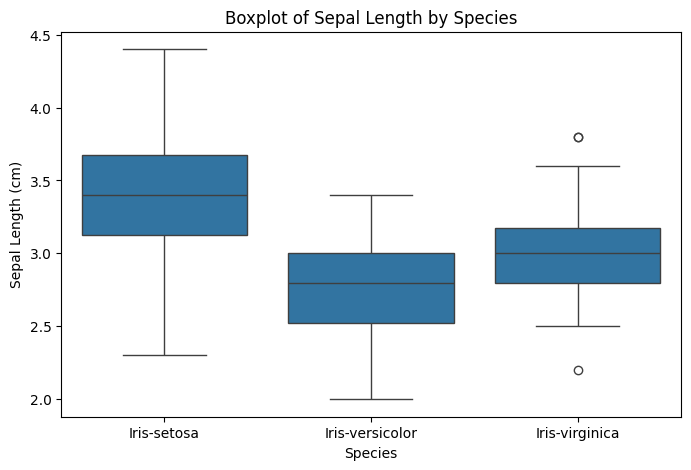

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

In [19]:
df.groupby(['Species'])['PetalLengthCm'].median()

Species
Iris-setosa        1.50
Iris-versicolor    4.35
Iris-virginica     5.55
Name: PetalLengthCm, dtype: float64

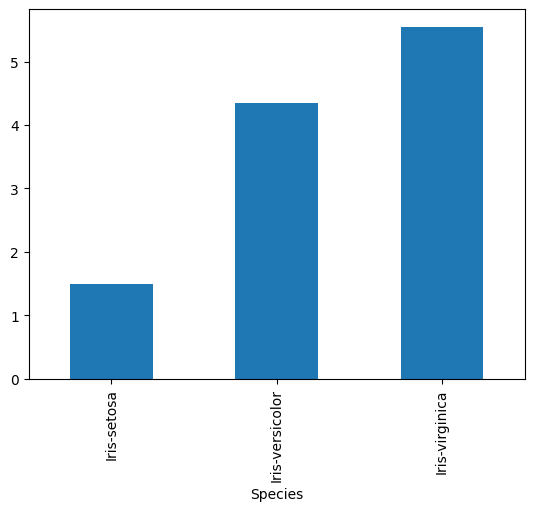

In [20]:
df.groupby(['Species'])['PetalLengthCm'].median().plot(kind='bar')
plt.show()

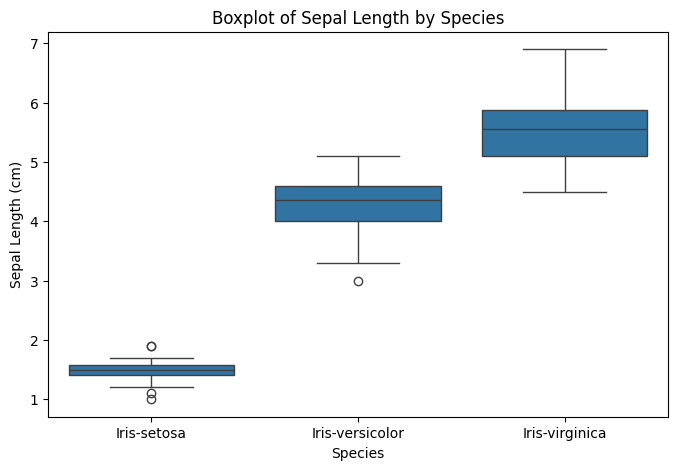

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

In [22]:
df.groupby(['Species'])['PetalWidthCm'].median()

Species
Iris-setosa        0.2
Iris-versicolor    1.3
Iris-virginica     2.0
Name: PetalWidthCm, dtype: float64

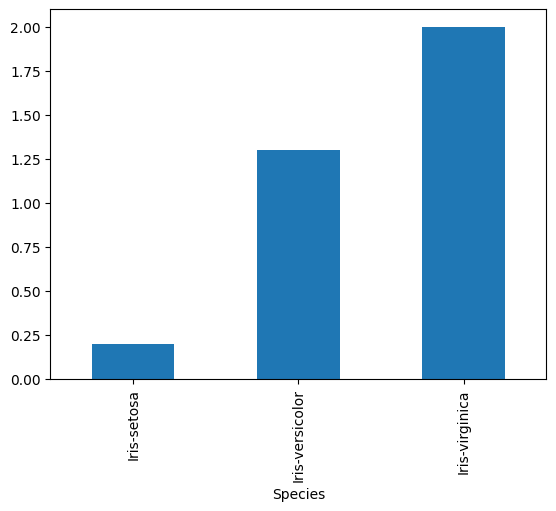

In [23]:
df.groupby(['Species'])['PetalWidthCm'].median().plot(kind='bar')
plt.show()

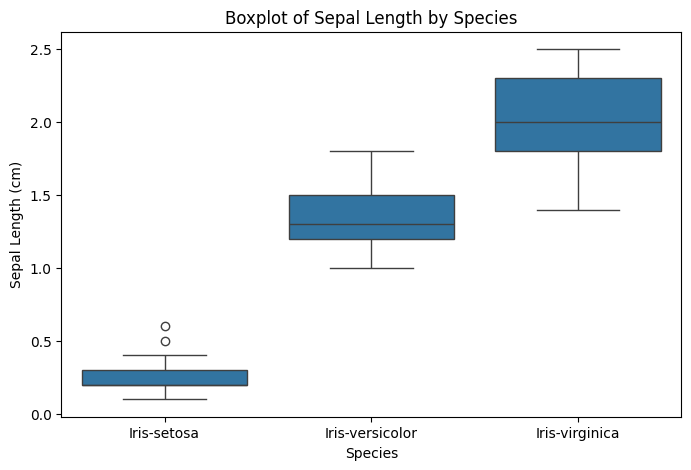

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
iris_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),                 
    ('classifier', RandomForestClassifier(random_state=42))
])

In [29]:
iris_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [30]:
y_pred = iris_pipeline.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 1.0

🔍 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


📊 Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [31]:
import pickle

with open('../pipeline_model.pkl', 'wb') as file:
    pickle.dump(iris_pipeline, file)